# **THE SPARKS FOUNDATION**

# **TASK 1: PREDICTION USING SUPERVISED ML**

Predict the percentage of a student based on the number of study hours 

DATASET: http://bit.ly/w-data

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
dataset = "http://bit.ly/w-data"
data=pd.read_csv(dataset)

In [31]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [33]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [34]:
data.shape

(25, 2)

In [35]:
#To check for null values in the dataset
data.isnull==True

False

Thus, there are no null values found in the dataset. Hence, we can proceed further.

## **Checking the relation between Independent and Target Variable**

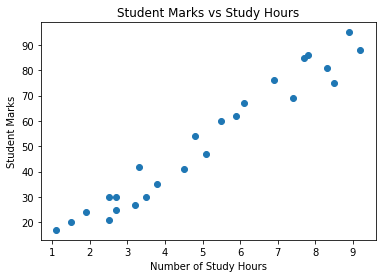

In [36]:
plt.scatter(data['Hours'], data['Scores'])
plt.xlabel("Number of Study Hours")
plt.ylabel("Student Marks")
plt.title("Student Marks vs Study Hours")
plt.show()

**Observation:** We can clearly notice that Number of Study Hours is linearly related to the Marks of the student.

In [37]:
print(data.corr()) #to find correlation between hours and scores

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


## **Splitting the Dataset**

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['Hours'].values.reshape(-1,1), data['Scores'], test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((20, 1), (20,), (5, 1), (5,))

## **Training The Model**

In [39]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## **Plotting the Predicted Line**

In [40]:
coefficient = model.coef_
intercept = model.intercept_

# Since, y = m*x + c
line = (data['Hours'].values * coefficient) + intercept

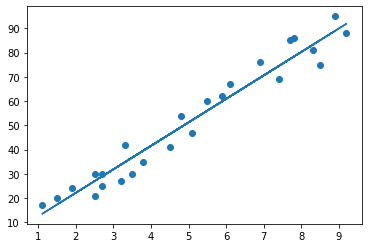

In [41]:
plt.scatter(data.Hours, data.Scores)
plt.plot(data.Hours, line)
plt.show()

In [42]:
pred = model.predict(X_test)
pred

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

In [43]:
#Comparing Actual V/S Predicted Values
pred_compare = pd.DataFrame({'Actual Values': y_test, 'Predicted Values':pred})
pred_compare

,Actual Values,Predicted Values
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


## **Evaluating the Model**

In [44]:
from sklearn import metrics
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, pred))

Mean Absolute Error:  3.9207511902099244
Mean Squared Error:  18.943211722315272


## **What will be predicted score if a student studies for 9.25 hrs in a day?**

In [45]:
hours = np.asarray(9.25).reshape(-1,1)
print(f"{model.predict(hours)[0]} will be predicted score if a student studies for 9.25 hrs in a day.")

92.38611528261494 will be predicted score if a student studies for 9.25 hrs in a day.
